<a href="https://colab.research.google.com/github/omtriguero/Artificial-Intelligence-Projects/blob/main/TP1/Final_Capstone_Project_updatedrelationship_W_C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        # **Data Loading and Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os
import cv2
import random
import zipfile
from google.colab.patches import cv2_imshow
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



# Load data from CSV file
csv_file_path = '/content/Nutrition_Value_Dataset.csv'
df = pd.read_csv(csv_file_path)





In [ ]:
# Define a function to calculate Hunger Level
def calculate_hunger_level(row):
    fat_weight = 9
    carb_weight = 4
    protein_weight = 4


    fat = row['Total Fat (g)']
    carbohydrates = row['Carbohydrates (g)']
    protein = row['Protein (g)']


    # Calculate Hunger Level
    hunger_level = (carbohydrates * carb_weight) + (protein * protein_weight) +(fat * fat_weight)

    return hunger_level

In [ ]:
df['Hunger Level'] = df.apply(calculate_hunger_level, axis=1)
# modify the hunger level from any values to 1-15level, then carry out regression part


In [ ]:



df


,Company,Category,Product,Per Serve Size,Energy (kCal),Carbohydrates (g),Protein (g),Fiber (g),Sugar (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Hunger Level
0,Pizza Hut,All Meals,Corn n Cheese (Personal),143.5 g,432.60,65.64,17.91,3.85,0.0,10.93,5.14,0.16,16.19,499.72,432.57
1,Pizza Hut,All Meals,Country Feast (Personal),178 g,407.60,67.11,16.73,7.19,0.0,8.03,3.24,0.11,66.80,818.00,407.63
2,Pizza Hut,All Meals,Double Cheese (Personal),143 g,423.33,59.97,18.26,3.49,0.0,12.27,5.23,0.18,19.75,638.22,423.35
3,Pizza Hut,All Meals,Double Paneer Supreme (Personal),174.5 g,474.03,52.86,20.07,3.79,0.0,20.26,9.25,0.33,71.72,1128.11,474.06
4,Pizza Hut,All Meals,Farmer`s Pick (Personal),177 g,408.16,53.93,19.91,2.46,0.0,12.53,4.90,0.14,48.09,942.67,408.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Dominos,All Meals,CHICKEN WINGS,174.0,352.90,24.50,35.30,5.76,10.4,12.60,4.80,0.19,308.70,NaN,352.60
526,Dominos,All Meals,CRISPY CHICKEN STRIPS,156.0,461.20,51.30,26.70,5.16,3.6,13.90,4.30,0.17,713.07,NaN,437.10
527,Dominos,All Meals,ZINGY PARCEL CHICKEN,210.0,667.50,17.30,19.20,16.92,10.6,31.30,14.10,0.56,541.49,NaN,427.70
528,Dominos,All Meals,TACO MEXICANA - CHICKEN,97.0,322.60,34.20,9.30,5.40,3.9,16.50,4.50,0.18,564.30,NaN,322.50


In [ ]:

# Input values for weight_kg, height_cm, and age_years
weight_kg_input = float(input("Enter weight in kilograms: "))
height_cm_input = float(input("Enter height in centimeters: "))
age_years_input = int(input("Enter age in years: "))

# Define a function to calculate BMR for men
def calculate_bmr_men(weight_kg, height_cm, age_years):
    return 88.362 + (13.397 * weight_kg) + (4.799 * height_cm) - (5.677 * age_years)



# Apply the functions to calculate BMR for men and women
df['BMR_Men'] = calculate_bmr_men(weight_kg_input, height_cm_input, age_years_input)


# Display the updated dataframe
df



Enter weight in kilograms: 55
Enter height in centimeters: 140
Enter age in years: 15


,Company,Category,Product,Per Serve Size,Energy (kCal),Carbohydrates (g),Protein (g),Fiber (g),Sugar (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Hunger Level,BMR_Men
0,Pizza Hut,All Meals,Corn n Cheese (Personal),143.5 g,432.60,65.64,17.91,3.85,0.0,10.93,5.14,0.16,16.19,499.72,432.57,1411.902
1,Pizza Hut,All Meals,Country Feast (Personal),178 g,407.60,67.11,16.73,7.19,0.0,8.03,3.24,0.11,66.80,818.00,407.63,1411.902
2,Pizza Hut,All Meals,Double Cheese (Personal),143 g,423.33,59.97,18.26,3.49,0.0,12.27,5.23,0.18,19.75,638.22,423.35,1411.902
3,Pizza Hut,All Meals,Double Paneer Supreme (Personal),174.5 g,474.03,52.86,20.07,3.79,0.0,20.26,9.25,0.33,71.72,1128.11,474.06,1411.902
4,Pizza Hut,All Meals,Farmer`s Pick (Personal),177 g,408.16,53.93,19.91,2.46,0.0,12.53,4.90,0.14,48.09,942.67,408.13,1411.902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Dominos,All Meals,CHICKEN WINGS,174.0,352.90,24.50,35.30,5.76,10.4,12.60,4.80,0.19,308.70,NaN,352.60,1411.902
526,Dominos,All Meals,CRISPY CHICKEN STRIPS,156.0,461.20,51.30,26.70,5.16,3.6,13.90,4.30,0.17,713.07,NaN,437.10,1411.902
527,Dominos,All Meals,ZINGY PARCEL CHICKEN,210.0,667.50,17.30,19.20,16.92,10.6,31.30,14.10,0.56,541.49,NaN,427.70,1411.902
528,Dominos,All Meals,TACO MEXICANA - CHICKEN,97.0,322.60,34.20,9.30,5.40,3.9,16.50,4.50,0.18,564.30,NaN,322.50,1411.902


In [ ]:
# Add new columns with the difference between 'Hunger Level' and 'BMR_Men' and between 'Hunger Level' and 'BMR_Women'
df['Hunger_BMR_Men_Difference'] =df['BMR_Men'] - df['Hunger Level']
df

,Company,Category,Product,Per Serve Size,Energy (kCal),Carbohydrates (g),Protein (g),Fiber (g),Sugar (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Hunger Level,BMR_Men,Hunger_BMR_Men_Difference
0,Pizza Hut,All Meals,Corn n Cheese (Personal),143.5 g,432.60,65.64,17.91,3.85,0.0,10.93,5.14,0.16,16.19,499.72,432.57,1411.902,979.332
1,Pizza Hut,All Meals,Country Feast (Personal),178 g,407.60,67.11,16.73,7.19,0.0,8.03,3.24,0.11,66.80,818.00,407.63,1411.902,1004.272
2,Pizza Hut,All Meals,Double Cheese (Personal),143 g,423.33,59.97,18.26,3.49,0.0,12.27,5.23,0.18,19.75,638.22,423.35,1411.902,988.552
3,Pizza Hut,All Meals,Double Paneer Supreme (Personal),174.5 g,474.03,52.86,20.07,3.79,0.0,20.26,9.25,0.33,71.72,1128.11,474.06,1411.902,937.842
4,Pizza Hut,All Meals,Farmer`s Pick (Personal),177 g,408.16,53.93,19.91,2.46,0.0,12.53,4.90,0.14,48.09,942.67,408.13,1411.902,1003.772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Dominos,All Meals,CHICKEN WINGS,174.0,352.90,24.50,35.30,5.76,10.4,12.60,4.80,0.19,308.70,NaN,352.60,1411.902,1059.302
526,Dominos,All Meals,CRISPY CHICKEN STRIPS,156.0,461.20,51.30,26.70,5.16,3.6,13.90,4.30,0.17,713.07,NaN,437.10,1411.902,974.802
527,Dominos,All Meals,ZINGY PARCEL CHICKEN,210.0,667.50,17.30,19.20,16.92,10.6,31.30,14.10,0.56,541.49,NaN,427.70,1411.902,984.202
528,Dominos,All Meals,TACO MEXICANA - CHICKEN,97.0,322.60,34.20,9.30,5.40,3.9,16.50,4.50,0.18,564.30,NaN,322.50,1411.902,1089.402


In [ ]:


df['Hunger Level Scale'] = df['Hunger_BMR_Men_Difference'].apply(lambda x: min(round((x / 1000) * 15), 15))

df

,Company,Category,Product,Per Serve Size,Energy (kCal),Carbohydrates (g),Protein (g),Fiber (g),Sugar (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Hunger Level,BMR_Men,Hunger_BMR_Men_Difference,Hunger Level Scale
0,Pizza Hut,All Meals,Corn n Cheese (Personal),143.5 g,432.60,65.64,17.91,3.85,0.0,10.93,5.14,0.16,16.19,499.72,432.57,1411.902,979.332,15
1,Pizza Hut,All Meals,Country Feast (Personal),178 g,407.60,67.11,16.73,7.19,0.0,8.03,3.24,0.11,66.80,818.00,407.63,1411.902,1004.272,15
2,Pizza Hut,All Meals,Double Cheese (Personal),143 g,423.33,59.97,18.26,3.49,0.0,12.27,5.23,0.18,19.75,638.22,423.35,1411.902,988.552,15
3,Pizza Hut,All Meals,Double Paneer Supreme (Personal),174.5 g,474.03,52.86,20.07,3.79,0.0,20.26,9.25,0.33,71.72,1128.11,474.06,1411.902,937.842,14
4,Pizza Hut,All Meals,Farmer`s Pick (Personal),177 g,408.16,53.93,19.91,2.46,0.0,12.53,4.90,0.14,48.09,942.67,408.13,1411.902,1003.772,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Dominos,All Meals,CHICKEN WINGS,174.0,352.90,24.50,35.30,5.76,10.4,12.60,4.80,0.19,308.70,NaN,352.60,1411.902,1059.302,15
526,Dominos,All Meals,CRISPY CHICKEN STRIPS,156.0,461.20,51.30,26.70,5.16,3.6,13.90,4.30,0.17,713.07,NaN,437.10,1411.902,974.802,15
527,Dominos,All Meals,ZINGY PARCEL CHICKEN,210.0,667.50,17.30,19.20,16.92,10.6,31.30,14.10,0.56,541.49,NaN,427.70,1411.902,984.202,15
528,Dominos,All Meals,TACO MEXICANA - CHICKEN,97.0,322.60,34.20,9.30,5.40,3.9,16.50,4.50,0.18,564.30,NaN,322.50,1411.902,1089.402,15


In [ ]:
# Function to calculate weight lost in kilograms
def calories_to_weight_lost_kg(calories):
    return calories / 3500

# Apply the function to calculate weight lost for each difference in calories for men
df['Weight Lost (kg) Men'] = calories_to_weight_lost_kg(df['Hunger_BMR_Men_Difference'])


# Display the updated dataframe
df



,Company,Category,Product,Per Serve Size,Energy (kCal),Carbohydrates (g),Protein (g),Fiber (g),Sugar (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Hunger Level,BMR_Men,Hunger_BMR_Men_Difference,Hunger Level Scale,Weight Lost (kg) Men
0,Pizza Hut,All Meals,Corn n Cheese (Personal),143.5 g,432.60,65.64,17.91,3.85,0.0,10.93,5.14,0.16,16.19,499.72,432.57,1411.902,979.332,15,0.279809
1,Pizza Hut,All Meals,Country Feast (Personal),178 g,407.60,67.11,16.73,7.19,0.0,8.03,3.24,0.11,66.80,818.00,407.63,1411.902,1004.272,15,0.286935
2,Pizza Hut,All Meals,Double Cheese (Personal),143 g,423.33,59.97,18.26,3.49,0.0,12.27,5.23,0.18,19.75,638.22,423.35,1411.902,988.552,15,0.282443
3,Pizza Hut,All Meals,Double Paneer Supreme (Personal),174.5 g,474.03,52.86,20.07,3.79,0.0,20.26,9.25,0.33,71.72,1128.11,474.06,1411.902,937.842,14,0.267955
4,Pizza Hut,All Meals,Farmer`s Pick (Personal),177 g,408.16,53.93,19.91,2.46,0.0,12.53,4.90,0.14,48.09,942.67,408.13,1411.902,1003.772,15,0.286792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Dominos,All Meals,CHICKEN WINGS,174.0,352.90,24.50,35.30,5.76,10.4,12.60,4.80,0.19,308.70,NaN,352.60,1411.902,1059.302,15,0.302658
526,Dominos,All Meals,CRISPY CHICKEN STRIPS,156.0,461.20,51.30,26.70,5.16,3.6,13.90,4.30,0.17,713.07,NaN,437.10,1411.902,974.802,15,0.278515
527,Dominos,All Meals,ZINGY PARCEL CHICKEN,210.0,667.50,17.30,19.20,16.92,10.6,31.30,14.10,0.56,541.49,NaN,427.70,1411.902,984.202,15,0.281201
528,Dominos,All Meals,TACO MEXICANA - CHICKEN,97.0,322.60,34.20,9.30,5.40,3.9,16.50,4.50,0.18,564.30,NaN,322.50,1411.902,1089.402,15,0.311258


# **Linear Regression Model**

In [ ]:


# Drop rows with NaN values in 'Weight Lost (kg) Men' or 'Hunger Level Scale'
df_regression = df.dropna(subset=['Hunger Level', 'Hunger Level Scale'])

# Define features (X) and target variable (y)
X = df_regression[['Hunger Level']]
y = df_regression['Hunger Level Scale']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
regression_model = LinearRegression()

# Train the model on the training set
regression_model.fit(X_train, y_train)

# Predict the Weight Lost (kg) Men for the test set
y_pred = regression_model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.6273895853858696


# **Text Preprocessing and CNN Model and User Input and Recommendations**

Enter Hunger Level (1(Least) to 15(Highest)): 9
Recommended meals for Hunger Level 9 :
Veg Maharaja Mac - Weight Lost: 0.170972 kg
Chicken Cheese Lava Burger - Weight Lost: 0.169052 kg
6 Pc - Weight Lost: 0.18031485714285717 kg
Chick & Share Bucket: 5 pc
Hot & Crispy - Weight Lost: 0.16880057142857147 kg

Enter a Meal: Pizza

Top recommendations containing the typed word:
Pizza Puff
VEGGIE DELUXE PIZZA REGULAR
VEGGIE DELUXE PIZZA MEDIUM
VEGGIE DELUXE PIZZA LARGE

Displaying images containing the typed word:


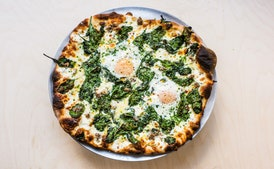

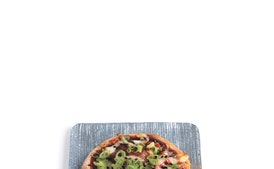

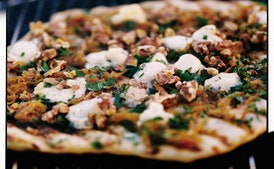

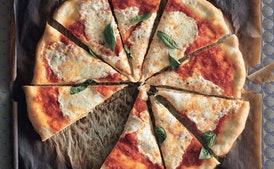

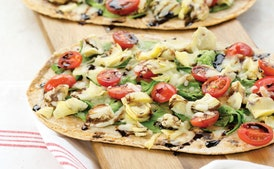

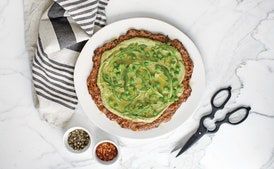

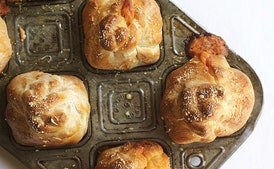

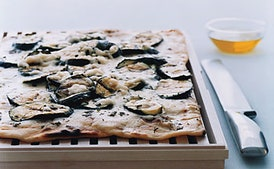

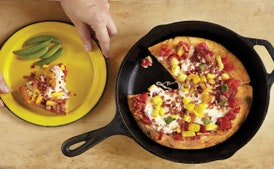

In [ ]:

# Assuming df is your DataFrame containing the data
user_hunger_level = int(input("Enter Hunger Level (1(Least) to 15(Highest)): "))

# Filter meals based on user's hunger level
matching_meals = df[df['Hunger Level Scale'] == user_hunger_level]

if matching_meals.empty:
    print("No meals available for the selected hunger level.")
else:
    print("Recommended meals for Hunger Level", user_hunger_level, ":")
    for index, row in matching_meals.iterrows():
        print(row['Product'], "- Weight Lost:", row['Weight Lost (kg) Men'], "kg")

# Display top recommendations based on the typed word
user_input = input("\nEnter a Meal: ").lower()
matching_products = df[df['Product'].str.contains(user_input, case=False)]['Product'].values.tolist()
print("\nTop recommendations containing the typed word:")
print('\n'.join(matching_products[:10]))  # Display up to 10 matching products
with zipfile.ZipFile('/content/Food Images.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Food Images')

# Display images containing the typed word
image_folder_path = '/content/Food Images/Food Images'
image_names = os.listdir(image_folder_path)
matching_image_names = [img_name for img_name in image_names if user_input in img_name.lower()]
images_to_display = random.sample(matching_image_names, min(9, len(matching_image_names)))

print("\nDisplaying images containing the typed word:")
for img_name in images_to_display:
    img_path = os.path.join(image_folder_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        cv2_imshow(img)
    else:
        print("Failed to load image:", img_path)
